# 📊 Sales Analysis – Portfolio EDA

## 🎯 Introduction
This **Exploratory Data Analysis (EDA)** project aims to explore the sales dataset and extract **actionable insights** for key **stakeholders**.  
We cleaned and prepared the data to answer strategic questions related to **overall sales performance, customer behavior, and product performance**.

## 🎯 Objective
- Understand the **total revenue and sales performance** over the analyzed period.  
- Identify **time-based trends** (months, days, and hours) to optimize operations and marketing campaigns.  
- Analyze **customer behavior** to improve targeting and loyalty strategies.  
- Highlight **top-performing products** and **cross-selling opportunities**.

---

## ❓ Stakeholder Questions

### **Overall Sales**
1. What is the **total revenue** during the entire period?  
2. Which product generated the **highest volume and value**?  
3. What is the **average quantity ordered per transaction**?

### **Temporal Trends**
1. Which **months generate the most sales**?  
2. Which **days of the week** are the busiest?  
3. What is the **hourly distribution** of orders?

### **Customers and Orders**
1. Which **customers or addresses** place the most orders?  
2. How many orders are **multi-product** orders?  
3. Are there **repeat orders** from the same customers?

### **Products**
1. Which **products are frequently bought together**?  
2. Which products generate the **highest revenue**?  
3. Which products have the **lowest sales**?

### **Strategic Questions**
1. Which **geographic areas** generate the most revenue?  
2. Are there **seasonal peaks** to anticipate?  
3. Which products could benefit from **cross-selling promotions**?

---

## 🔧 Tools and Technologies
- **Python** (pandas, numpy, matplotlib, seaborn) for data analysis and visualizations.  
- **Google Colab** for running and sharing the notebook.  
- **Markdown** for clean and professional documentation.



In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📚 Step 1: Import Libraries

In this step, we import the necessary Python libraries for data analysis and visualization:

- **pandas** (`pd`): Used for data manipulation and analysis (DataFrames, CSV handling, etc.).
- **numpy** (`np`): Provides support for numerical operations and array handling.
- **matplotlib.pyplot** (`plt`): Basic plotting library for creating visualizations.
- **seaborn** (`sns`): Advanced visualization library built on matplotlib for statistical graphics.

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 📂 Step 2: Mount Google Drive

In this step, we mount **Google Drive** to access files directly from Colab.  
This is useful for loading datasets, saving outputs, or working with project files stored in your Drive.

```python
from google.colab import drive
drive.mount('/content/drive')


In [45]:
import os
import pandas as pd
from IPython.display import display

folder_path = "/content/drive/MyDrive/New_Analysis_Sales_Portfolio/data"

# Lister tous les fichiers CSV
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
print(f"Found {len(csv_files)} CSV files in {folder_path}")
print("Files found:", csv_files)

# Liste pour stocker les DataFrames
dfs = []

# Lire chaque CSV
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    try:
        # on_bad_lines='skip' remplace error_bad_lines
        df = pd.read_csv(file_path, on_bad_lines='skip', low_memory=False)
        dfs.append(df)
        print(f"Successfully read {csv_file}")
    except Exception as e:
        print(f"Error reading {csv_file}: {e}")

# Combiner tous les CSV en un seul DataFrame
if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)
    print("\nCombined DataFrame created:")
    display(combined_df.head())
    print(f"Shape of the combined DataFrame: {combined_df.shape}")
else:
    print("No DataFrames were successfully read from the CSV files.")


Found 12 CSV files in /content/drive/MyDrive/New_Analysis_Sales_Portfolio/data
Files found: ['Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_January_2019.csv', 'Sales_December_2019.csv', 'Sales_August_2019.csv', 'Sales_February_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_May_2019.csv', 'Sales_April_2019.csv', 'Sales_July_2019.csv', 'Sales_September_2019.csv']
Successfully read Sales_June_2019.csv
Successfully read Sales_March_2019.csv
Successfully read Sales_January_2019.csv
Successfully read Sales_December_2019.csv
Successfully read Sales_August_2019.csv
Successfully read Sales_February_2019.csv
Successfully read Sales_November_2019.csv
Successfully read Sales_October_2019.csv
Successfully read Sales_May_2019.csv
Successfully read Sales_April_2019.csv
Successfully read Sales_July_2019.csv
Successfully read Sales_September_2019.csv

Combined DataFrame created:


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


Shape of the combined DataFrame: (186850, 6)


# 📂 Step 3: Load and Combine CSV Files

In this step, we load all CSV files from a specific folder in Google Drive and combine them into a single **pandas DataFrame**.

```python
import os
import pandas as pd
from IPython.display import display

# Define the folder path containing CSV files
folder_path = "/content/drive/MyDrive/New_Analysis_Sales_Portfolio/data"

# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
print(f"Found {len(csv_files)} CSV files in {folder_path}")
print("Files found:", csv_files)

# List to store individual DataFrames
dfs = []

# Read each CSV file
for csv_file in csv_files:
    file_path = os.path.join(folder_path, csv_file)
    try:
        # 'on_bad_lines="skip"' replaces deprecated 'error_bad_lines'
        df = pd.read_csv(file_path, on_bad_lines='skip', low_memory=False)
        dfs.append(df)
        print(f"Successfully read {csv_file}")
    except Exception as e:
        print(f"Error reading {csv_file}: {e}")

# Combine all DataFrames into a single DataFrame
if dfs:
    combined_df = pd.concat(dfs, ignore_index=True)
    print("\nCombined DataFrame created:")
    display(combined_df.head())
    print(f"Shape of the combined DataFrame: {combined_df.shape}")
else:
    print("No DataFrames were successfully read from the CSV files.")


In [46]:
# Info des colonnes, types et valeurs nulles
combined_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [47]:
# Nombre de lignes et de colonnes
print("Shape of DataFrame:", combined_df.shape)


Shape of DataFrame: (186850, 6)


In [48]:
# 5 premières lignes
combined_df.head()



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


In [49]:

# 5 dernières lignes
combined_df.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"
186849,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016"


# 🔎 Step 4: Inspect DataFrame Structure and Overview

In this step, we perform an initial inspection of the combined DataFrame to understand its **structure, data types, missing values, and basic contents**.

```python
# Display column info, data types, and missing values
combined_df.info()

# Show the shape (number of rows and columns)
print("Shape of DataFrame:", combined_df.shape)

# Display the first 5 rows
combined_df.head()

# Display the last 5 rows
combined_df.tail()


In [50]:
# Convertir en nombres, transformer les valeurs invalides en NaN
combined_df['Quantity Ordered'] = pd.to_numeric(combined_df['Quantity Ordered'], errors='coerce')
combined_df['Price Each'] = pd.to_numeric(combined_df['Price Each'], errors='coerce')


# 🔢 Step 5: Convert Columns to Numeric and Handle Invalid Values

In this step, we ensure that **Quantity Ordered** and **Price Each** are numeric.  
Any invalid values that cannot be converted are replaced with **NaN**.

```python
# Convert columns to numeric, invalid values become NaN
combined_df['Quantity Ordered'] = pd.to_numeric(combined_df['Quantity Ordered'], errors='coerce')
combined_df['Price Each'] = pd.to_numeric(combined_df['Price Each'], errors='coerce')


In [51]:
print(combined_df[['Quantity Ordered', 'Price Each']].isnull().sum())


Quantity Ordered    900
Price Each          900
dtype: int64


# ⚠️ Step 6: Check for Missing Values

In this step, we identify **missing or invalid values** in the key numeric columns: **Quantity Ordered** and **Price Each**.

```python
# Count the number of missing values in the selected columns
print(combined_df[['Quantity Ordered', 'Price Each']].isnull().sum())


In [52]:
combined_df = combined_df.dropna(subset=['Quantity Ordered', 'Price Each'])


# 🧹 Step 7: Remove Rows with Missing Values

In this step, we **clean the dataset** by removing rows where **Quantity Ordered** or **Price Each** are missing (`NaN`).

```python
# Drop rows with NaN in the selected columns
combined_df = combined_df.dropna(subset=['Quantity Ordered', 'Price Each'])


In [53]:
print(combined_df.shape)
print(combined_df.isnull().sum())


(185950, 6)
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


# ✅ Step 8: Verify DataFrame After Cleaning

In this step, we check the **shape** of the cleaned DataFrame and confirm that there are **no missing values** in the key columns.

```python
# Display the shape of the cleaned DataFrame
print(combined_df.shape)

# Check for any remaining missing values
print(combined_df.isnull().sum())


In [55]:
combined_df['Order Date'] = pd.to_datetime(combined_df['Order Date'], errors='coerce')


/tmp/ipython-input-2053428508.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df['Order Date'] = pd.to_datetime(combined_df['Order Date'], errors='coerce')


# 📅 Step 9: Convert "Order Date" to Datetime

In this step, we convert the **Order Date** column to a **datetime** type.  
This is essential for **time-based analysis**, such as tracking sales trends by day, month, or hour.

```python
# Convert 'Order Date' to datetime, invalid entries become NaT
combined_df['Order Date'] = pd.to_datetime(combined_df['Order Date'], errors='coerce')


In [56]:
print(combined_df.dtypes)
print(combined_df.shape)
print(combined_df.isnull().sum())


Order ID                    object
Product                     object
Quantity Ordered           float64
Price Each                 float64
Order Date          datetime64[ns]
Purchase Address            object
dtype: object
(185950, 6)
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


In [57]:
# Cas 1 : détecter les vrais doublons (exactement identiques sur toutes les colonnes)
exact_duplicates = combined_df[combined_df.duplicated(keep=False)]

print(f"Nombre de lignes totalement dupliquées : {exact_duplicates.shape[0]}")

# Cas 2 : voir les commandes multi-produits (même Order ID mais lignes différentes)
multi_order = combined_df.groupby("Order ID").size().reset_index(name="nb_products")
multi_order = multi_order[multi_order["nb_products"] > 1]

print(f"Nombre de commandes avec plusieurs produits : {multi_order.shape[0]}")
multi_order.head(10)


Nombre de lignes totalement dupliquées : 528
Nombre de commandes avec plusieurs produits : 7136


,Order ID,nb_products
41,141275,2
56,141290,2
131,141365,2
150,141384,2
216,141450,2
223,141457,2
244,141478,2
316,141550,3
353,141587,2
411,141645,2


In [58]:
# Supprimer uniquement les doublons exacts (toutes colonnes identiques)
combined_df = combined_df.drop_duplicates()

print(combined_df.shape)
print("Nombre de doublons exacts supprimés :", 185950 - combined_df.shape[0])


(185686, 6)
Nombre de doublons exacts supprimés : 264


# Nettoyage du dataset - Étapes détaillées

## 1️⃣ Import des bibliothèques
- `os` : pour manipuler les chemins et lister les fichiers dans un dossier.
- `pandas` : pour lire et manipuler les fichiers CSV.
- `display` : pour afficher joliment les DataFrames dans Colab.

---

## 2️⃣ Définition du chemin vers le dossier CSV
- On précise l’emplacement exact des fichiers sur Google Drive :  
  `/content/drive/MyDrive/New_Analysis_Sales_Portfolio/data`

---

## 3️⃣ Lister tous les fichiers CSV
- On récupère uniquement les fichiers `.csv` pour les lire ensuite.
- Permet de vérifier combien de fichiers sont disponibles avant de les combiner.

---

## 4️⃣ Lecture et combinaison des CSV
- Chaque fichier CSV est lu dans un DataFrame séparé.
- `on_bad_lines='skip'` : ignore les lignes mal formatées.
- `low_memory=False` : évite les avertissements sur les types de colonnes.
- Tous les DataFrames sont combinés en un seul DataFrame global.

---

## 5️⃣ Nettoyage des colonnes numériques
- Conversion des colonnes `Quantity Ordered` et `Price Each` de `object` → `float`.
- Les valeurs impossibles à convertir deviennent `NaN`.
- Suppression des lignes avec des `NaN` dans ces colonnes pour garder uniquement des données valides.

---

## 6️⃣ Conversion de la colonne 'Order Date'
- Transformation de `Order Date` en type `datetime`.
- Permet ensuite d’extraire facilement le mois, le jour, l’heure ou le jour de la semaine.

---

## 7️⃣ Détection et suppression des doublons exacts
- Détection des lignes **100% identiques** sur toutes les colonnes (`duplicated(keep=False)`).
- Suppression des doublons exacts avec `drop_duplicates()`.
- Important : les commandes multi-produits (même `Order ID` mais produits différents) **ne sont pas supprimées**.

---

## ✅ Résultat final après nettoyage
- Dataset propre et prêt pour l’analyse.
- Colonnes numériques correctement typées (`Quantity Ordered`, `Price Each`).
- `Order Date` en format datetime.
- Plus de valeurs manquantes dans les colonnes importantes.
- Doublons exacts supprimés.
- Commandes multi-produits conservées.


In [59]:
combined_df[['Quantity Ordered', 'Price Each']].describe()


,Quantity Ordered,Price Each
count,185686.000000,185686.000000
mean,1.124544,184.519255
std,0.443069,332.843838
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,1700.000000


In [60]:
combined_df.isnull().sum()


,0
Order ID,0
Product,0
Quantity Ordered,0
Price Each,0
Order Date,0
Purchase Address,0


In [61]:
# Colonnes numériques
num_cols = combined_df.select_dtypes(include=['float64', 'int64']).columns
print("Numeric columns:", num_cols)

# Colonnes catégorielles
cat_cols = combined_df.select_dtypes(include=['object']).columns
print("Categorical columns:", cat_cols)


Numeric columns: Index(['Quantity Ordered', 'Price Each'], dtype='object')
Categorical columns: Index(['Order ID', 'Product', 'Purchase Address'], dtype='object')


In [62]:
for col in cat_cols:
    print(f"\nColumn: {col}")
    print(combined_df[col].value_counts().head(10))  # top 10 valeurs



Column: Order ID
Order ID
160873    5
277875    4
296353    4
193511    4
312462    4
295681    4
165665    4
194253    4
242936    4
312407    4
Name: count, dtype: int64

Column: Product
Product
USB-C Charging Cable          21859
Lightning Charging Cable      21610
AAA Batteries (4-pack)        20612
AA Batteries (4-pack)         20558
Wired Headphones              18849
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
Name: count, dtype: int64

Column: Purchase Address
Purchase Address
193 Forest St, San Francisco, CA 94016        9
223 Elm St, Los Angeles, CA 90001             8
279 Sunset St, San Francisco, CA 94016        8
176 North St, San Francisco, CA 94016         7
640 West St, San Francisco, CA 94016          7
662 Chestnut St, San Francisco, CA 94016      7
292 Washington St, San Francisco, CA 94016    7
727 9th St, San Francisco, CA 94016  

Nombre de lignes avec au moins un outlier : 54325


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,209922,Macbook Pro Laptop,1.0,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1.0,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001"
15,209936,34in Ultrawide Monitor,1.0,379.99,2019-06-15 12:21:00,"769 Dogwood St, Dallas, TX 75001"
17,209938,iPhone,1.0,700.00,2019-06-15 12:29:00,"766 Meadow St, Seattle, WA 98101"
19,209939,Google Phone,1.0,600.00,2019-06-08 16:55:00,"313 South St, San Francisco, CA 94016"
20,209940,34in Ultrawide Monitor,1.0,379.99,2019-06-26 15:24:00,"990 South St, Atlanta, GA 30301"
22,209942,27in 4K Gaming Monitor,1.0,389.99,2019-06-19 13:52:00,"874 Wilson St, Austin, TX 73301"
23,209943,AAA Batteries (4-pack),3.0,2.99,2019-06-23 16:19:00,"158 Willow St, Los Angeles, CA 90001"
26,209946,Google Phone,1.0,600.00,2019-06-28 22:13:00,"66 Cherry St, San Francisco, CA 94016"
28,209948,Macbook Pro Laptop,1.0,1700.00,2019-06-09 01:48:00,"101 Spruce St, Atlanta, GA 30301"


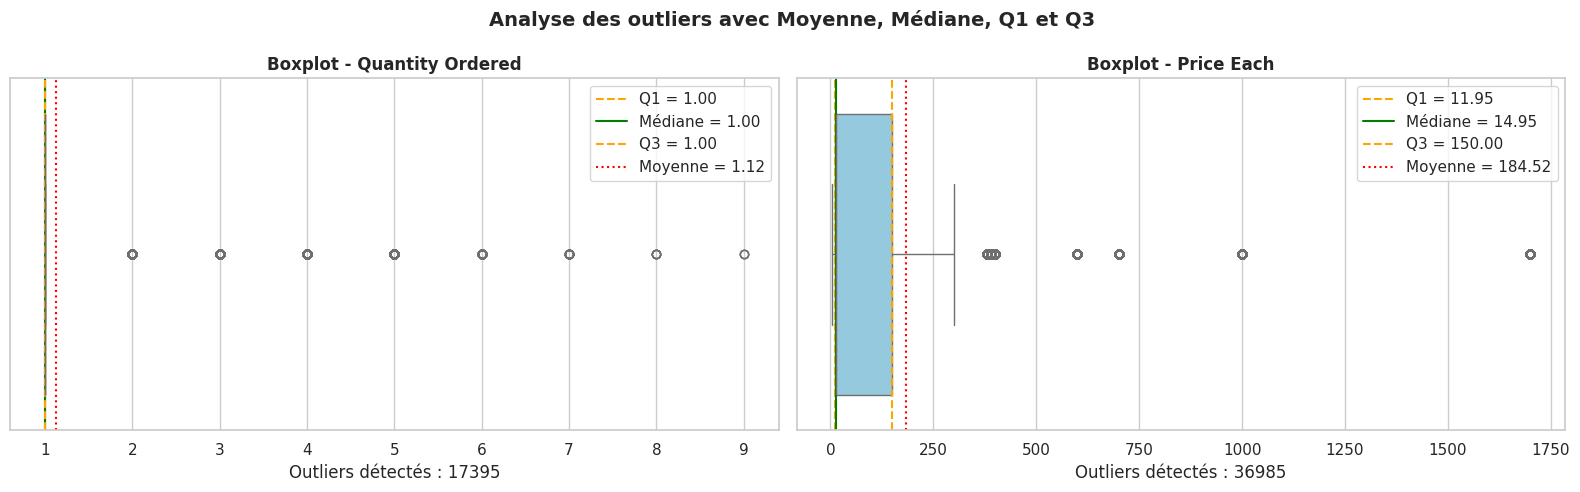

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ---------------------------
# Détection des outliers (méthode IQR)
# ---------------------------
def detect_outliers_iqr(df: pd.DataFrame, columns: list, factor: float = 1.5) -> pd.DataFrame:
    """Retourne les lignes contenant au moins un outlier selon la méthode IQR."""
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1

    condition = ((df[columns] < (Q1 - factor * IQR)) |
                 (df[columns] > (Q3 + factor * IQR))).any(axis=1)
    return df[condition]

# Colonnes à analyser
num_cols = ['Quantity Ordered', 'Price Each']

# Détection des outliers
outliers = detect_outliers_iqr(combined_df, num_cols)
print(f"Nombre de lignes avec au moins un outlier : {outliers.shape[0]}")
display(outliers.head(10))

# ---------------------------
# Visualisation avec lignes pour moyenne, médiane, Q1 et Q3
# ---------------------------
sns.set(style="whitegrid", palette="pastel")
fig, axes = plt.subplots(1, len(num_cols), figsize=(16, 5))

for i, col in enumerate(num_cols):
    Q1 = combined_df[col].quantile(0.25)
    Q3 = combined_df[col].quantile(0.75)
    median = combined_df[col].median()
    mean = combined_df[col].mean()
    IQR = Q3 - Q1
    outlier_count = ((combined_df[col] < (Q1 - 1.5 * IQR)) |
                     (combined_df[col] > (Q3 + 1.5 * IQR))).sum()

    # Boxplot
    sns.boxplot(x=combined_df[col], ax=axes[i], color="skyblue")

    # Lignes verticales
    axes[i].axvline(Q1, color='orange', linestyle='--', label=f'Q1 = {Q1:.2f}')
    axes[i].axvline(median, color='green', linestyle='-', label=f'Médiane = {median:.2f}')
    axes[i].axvline(Q3, color='orange', linestyle='--', label=f'Q3 = {Q3:.2f}')
    axes[i].axvline(mean, color='red', linestyle=':', label=f'Moyenne = {mean:.2f}')

    # Titres et légendes
    axes[i].set_title(f'Boxplot - {col}', fontsize=12, weight="bold")
    axes[i].set_xlabel(f'Outliers détectés : {outlier_count}')
    axes[i].legend()

plt.suptitle("Analyse des outliers avec Moyenne, Médiane, Q1 et Q3", fontsize=14, weight="bold")
plt.tight_layout()
plt.show()


In [64]:
print(df.columns)

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')


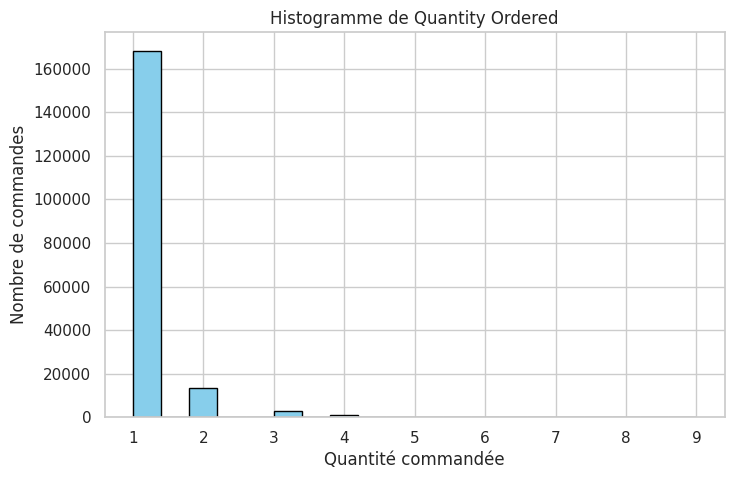

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns # Although seaborn is imported, it's not used in this specific cell, but keeping it as it's in the original code.

plt.figure(figsize=(8,5))
# Use combined_df instead of df
plt.hist(combined_df['Quantity Ordered'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogramme de Quantity Ordered')
plt.xlabel('Quantité commandée')
plt.ylabel('Nombre de commandes')
plt.show()

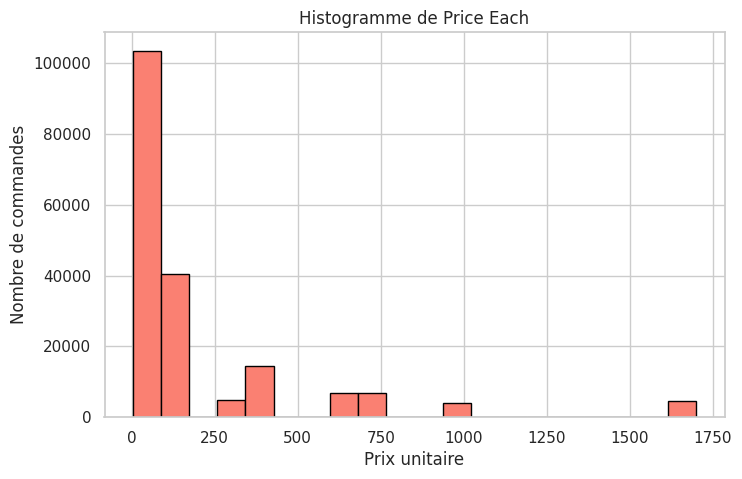

In [66]:

# ---------------------------
# Histogramme de Price Each
plt.figure(figsize=(8,5))
plt.hist(combined_df['Price Each'], bins=20, color='salmon', edgecolor='black')
plt.title('Histogramme de Price Each')
plt.xlabel('Prix unitaire')
plt.ylabel('Nombre de commandes')
plt.show()

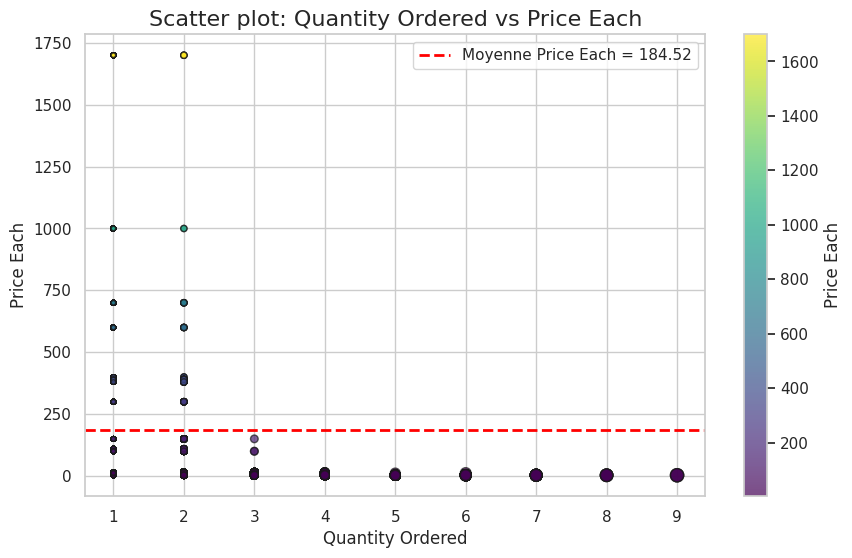

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Style seaborn
sns.set_style("whitegrid")

plt.figure(figsize=(10,6))

# Scatter plot avec couleur et taille
scatter = plt.scatter(
    combined_df['Quantity Ordered'],
    combined_df['Price Each'],
    c=combined_df['Price Each'],       # couleur selon le prix
    s=combined_df['Quantity Ordered']*10,  # taille selon la quantité
    cmap='viridis',
    alpha=0.7,
    edgecolor='k'
)

# Ligne de milieu : moyenne de Price Each
mean_price = combined_df['Price Each'].mean()
plt.axhline(mean_price, color='red', linestyle='--', linewidth=2, label=f'Moyenne Price Each = {mean_price:.2f}')

plt.title('Scatter plot: Quantity Ordered vs Price Each', fontsize=16)
plt.xlabel('Quantity Ordered', fontsize=12)
plt.ylabel('Price Each', fontsize=12)
plt.colorbar(scatter, label='Price Each')  # légende couleur
plt.legend()
plt.show()


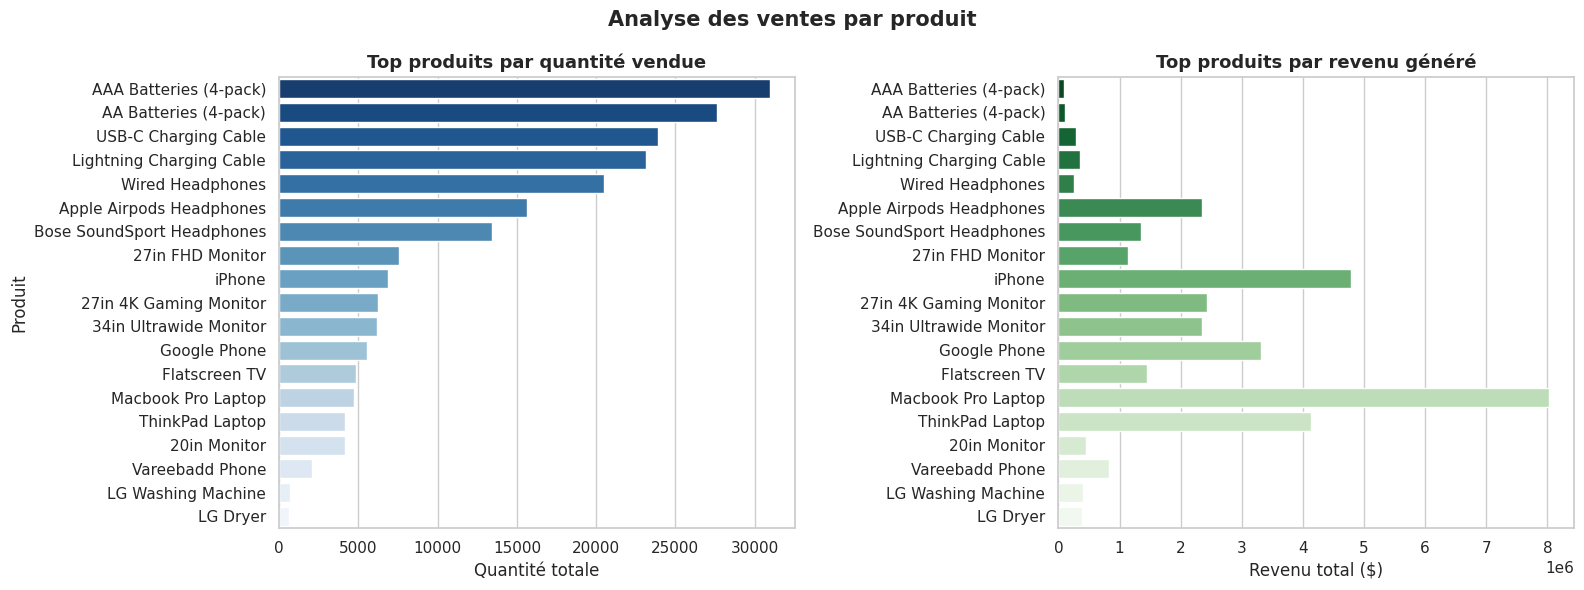

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ---------------------------
# 1. Calcul des indicateurs par produit
# ---------------------------
# Revenu = Quantité * Prix unitaire
combined_df['Revenue'] = combined_df['Quantity Ordered'] * combined_df['Price Each']

# Agrégation
product_stats = combined_df.groupby('Product').agg({
    'Quantity Ordered': 'sum',
    'Revenue': 'sum'
}).sort_values(by='Quantity Ordered', ascending=False)

# ---------------------------
# 2. Visualisations
# ---------------------------
sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# --- Barplot Quantité vendue
sns.barplot(
    x=product_stats['Quantity Ordered'],
    y=product_stats.index,
    hue=product_stats.index,    # Ajout pour éviter le warning
    legend=False,               # Supprime la légende inutile
    ax=axes[0],
    palette="Blues_r"
)
axes[0].set_title("Top produits par quantité vendue", fontsize=13, weight="bold")
axes[0].set_xlabel("Quantité totale")
axes[0].set_ylabel("Produit")

# --- Barplot Revenu
sns.barplot(
    x=product_stats['Revenue'],
    y=product_stats.index,
    hue=product_stats.index,    # Ajout pour éviter le warning
    legend=False,
    ax=axes[1],
    palette="Greens_r"
)
axes[1].set_title("Top produits par revenu généré", fontsize=13, weight="bold")
axes[1].set_xlabel("Revenu total ($)")
axes[1].set_ylabel("")

# Ajustement & affichage
plt.suptitle("Analyse des ventes par produit", fontsize=15, weight="bold")
plt.tight_layout()
plt.show()


## Analyse des ventes par produit

Le graphique ci-dessous présente une analyse des ventes en fonction de deux critères :

- **Top produits par quantité vendue (à gauche)**  
  Les articles les plus fréquemment achetés sont principalement des accessoires peu coûteux comme les piles (AAA et AA), les câbles de recharge (USB-C, Lightning) et les écouteurs.  
  👉 Cela montre que ces produits sont des **achats courants et répétés**, souvent en complément d'autres articles.

- **Top produits par revenu généré (à droite)**  
  Les produits qui génèrent le plus de revenus sont des équipements plus chers, comme les ordinateurs portables (MacBook Pro, ThinkPad), l’iPhone ou encore les moniteurs haute résolution.  
  👉 Même si les volumes sont plus faibles que pour les accessoires, leur **prix unitaire élevé** en fait des contributeurs majeurs au chiffre d’affaires.

### Insights principaux :
1. Les **produits à forte rotation** (batteries, câbles, écouteurs) sont essentiels pour le volume global des ventes.  
2. Les **produits premium** (ordinateurs portables, iPhone, grands écrans) assurent la majorité du chiffre d’affaires.  
3. Une stratégie combinant **produits de masse (pour attirer les clients)** et **produits haut de gamme (pour maximiser le revenu)** est clé pour la performance globale.

---


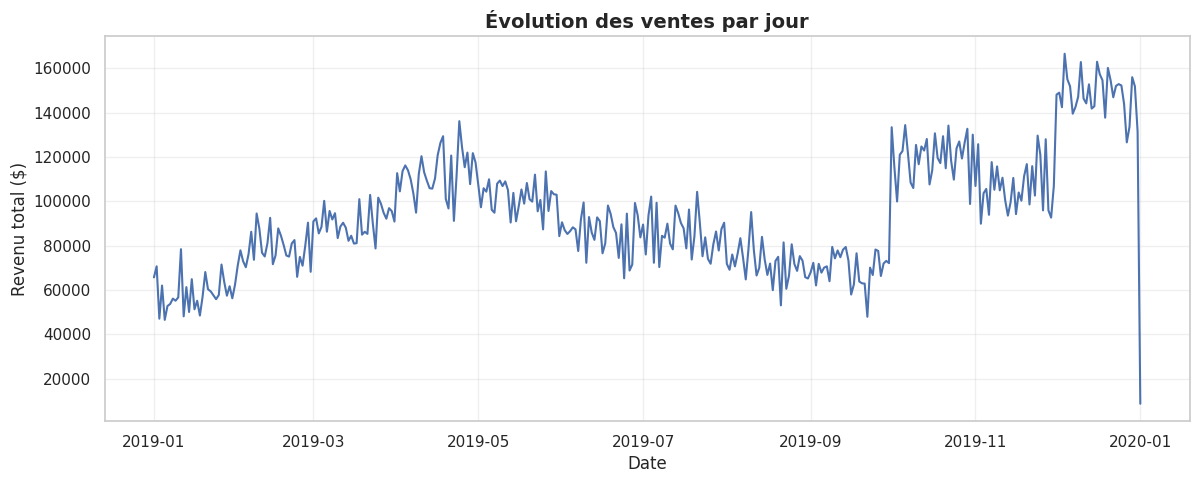

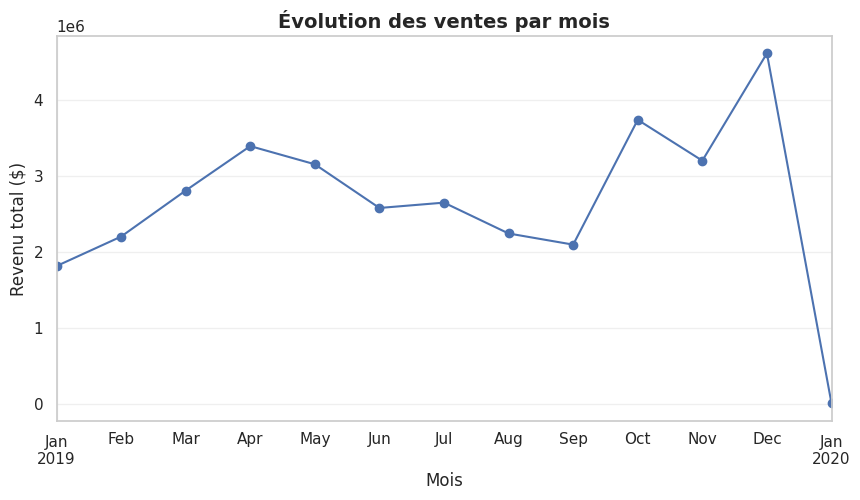

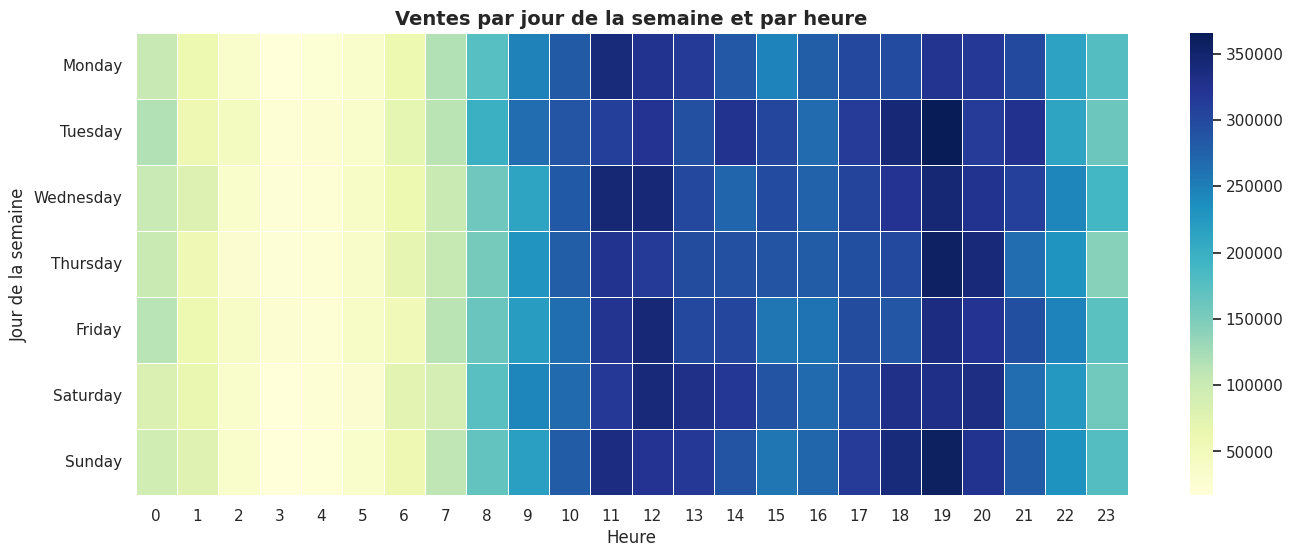

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ---------------------------
# 1. Conversion de la date
# ---------------------------
if not pd.api.types.is_datetime64_any_dtype(combined_df['Order Date']):
    combined_df['Order Date'] = pd.to_datetime(combined_df['Order Date'], errors='coerce')

# Supprimer les lignes avec dates invalides
combined_df = combined_df.dropna(subset=['Order Date'])

# ---------------------------
# 2. Evolution des ventes
# ---------------------------
# Ajout revenu si non présent
if 'Revenue' not in combined_df.columns:
    combined_df['Revenue'] = combined_df['Quantity Ordered'] * combined_df['Price Each']

# Ventes par jour
daily_sales = combined_df.groupby(combined_df['Order Date'].dt.date)['Revenue'].sum()

# Ventes par mois
monthly_sales = combined_df.groupby(combined_df['Order Date'].dt.to_period('M'))['Revenue'].sum()

# --- Line plot (par jour)
plt.figure(figsize=(14, 5))
daily_sales.plot()
plt.title("Évolution des ventes par jour", fontsize=14, weight="bold")
plt.xlabel("Date")
plt.ylabel("Revenu total ($)")
plt.grid(True, alpha=0.3)
plt.show()

# --- Line plot (par mois)
plt.figure(figsize=(10, 5))
monthly_sales.plot(marker="o")
plt.title("Évolution des ventes par mois", fontsize=14, weight="bold")
plt.xlabel("Mois")
plt.ylabel("Revenu total ($)")
plt.grid(True, alpha=0.3)
plt.show()

# ---------------------------
# 3. Heatmap : ventes par jour de semaine & heure
# ---------------------------
# Extraire jour et heure
combined_df['DayOfWeek'] = combined_df['Order Date'].dt.day_name()
combined_df['Hour'] = combined_df['Order Date'].dt.hour

# Agréger ventes
heatmap_data = combined_df.pivot_table(
    index='DayOfWeek',
    columns='Hour',
    values='Revenue',
    aggfunc='sum'
).fillna(0)

# Réorganiser l'ordre des jours (par défaut, day_name() met Lundi en premier si système FR/EN)
order_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
heatmap_data = heatmap_data.reindex(order_days)

# --- Heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", linewidths=.5)
plt.title("Ventes par jour de la semaine et par heure", fontsize=14, weight="bold")
plt.xlabel("Heure")
plt.ylabel("Jour de la semaine")
plt.show()


# 📊 Insight : Évolution des ventes par jour

L'analyse de l'évolution quotidienne des ventes montre plusieurs tendances importantes :

---

## 1. Croissance au début de l'année 2019
- Augmentation progressive du **revenu total** jusqu'à environ **avril-mai 2019**, indiquant une période de forte demande.

---

## 2. Stabilité et légère baisse en milieu d'année
- Entre **mai et septembre 2019**, le chiffre d'affaires se **stabilise avec une tendance légèrement à la baisse**, probablement liée à la **saisonnalité** ou à une **baisse d'activité**.

---

## 3. Pic à l'automne et en fin d'année
- Regain significatif des ventes à partir de **septembre**, culminant vers **novembre et décembre 2019**.  
- Causes possibles : **promotions saisonnières** ou **fêtes de fin d'année**.

---

## 4. Anomalie en fin décembre
- Chute brutale du revenu total à la **fin de décembre 2019**, probablement due à des **données manquantes** ou à la **clôture de l'année comptable**.

---

## Conclusion
Ces observations permettent de **planifier efficacement les campagnes marketing et les stocks**, en tenant compte des **périodes de forte demande** et des **périodes plus calmes**.



# 📈 Analyse de l’évolution des ventes

## 1. Tendance générale
- **Croissance progressive** entre janvier et avril 2019, avec un **pic à 3,4 M$ en avril**.  

- **Baisse estivale** modérée (juin → septembre), suivie d’une **forte reprise** en octobre et décembre, atteignant **4,6 M$**.  

- **Janvier 2020** : chute brutale, probablement **anomalie de données** ou interruption des ventes.

---

## 2. Points clés

| Mois           | Revenus (M$) | Commentaire                     |
|----------------|--------------|--------------------------------|
| Avril 2019     | 3,4          | Premier pic important           |
| Septembre 2019 | 2,1          | Mois le plus faible             |
| Décembre 2019  | 4,6          | Meilleur mois de l’année        |
| Janvier 2020   | 0            | Valeur anormale                 |

---

## 3. Hypothèses possibles
- **Baisse estivale** : impact de la saisonnalité (consommation plus faible en été).  

- **Pic de décembre** : effet de la période des fêtes.

- **Janvier 2020** : problème technique ou absence de données.

---

## 4. Recommandations
- 🔍 **Vérifier les données de janvier 2020** pour corriger l’anomalie.  
- 📈 **Renforcer les campagnes marketing** avant les pics de vente (fin d’année).  
- 🎯 **Stimuler les ventes estivales** via promotions ciblées pour compenser la baisse saisonnière.

---

## 5. Synthèse
L’entreprise montre **une croissance soutenue avec des pics saisonniers** (avril et décembre) et des baisses estivales.  
**Optimisation des stratégies marketing et correction des anomalies** permettront de stabiliser et d’augmenter les revenus annuels.




# 📊 Insight sur les ventes par jour et par heure

## 1. Tendances principales
- Les ventes sont **faibles entre minuit et 7h du matin**, quelle que soit la journée.  
- Une **forte activité commence à partir de 8h**, avec un **pic entre 11h et 14h**.  
- Une **seconde vague importante** est observée **entre 18h et 20h**, surtout en début de semaine.

---

## 2. Observations par jour
| Jour         | Observations principales                                  |
|-------------|-----------------------------------------------------------|
| Lundi       | Démarrage calme, montée progressive jusqu’au soir        |
| Mardi       | Jour le plus performant, pic **11h–14h**                 |
| Mercredi    | Très performant, pic **11h–14h**                          |
| Jeudi       | Activité modérée                                         |
| Vendredi    | Activité soutenue mais inférieure à mardi/mercredi       |
| Samedi      | Activité régulière toute la journée, pics moins intenses |
| Dimanche    | Même tendance que samedi                                 |

---

## 3. Opportunités stratégiques
- **Optimisation des équipes** : Renforcer les équipes en **fin de matinée (11h–14h)** et **début de soirée (18h–20h)**.  
- **Campagnes ciblées** : Lancer promotions/publicités **juste avant les pics horaires** pour maximiser l’impact.  
- **Événements spéciaux** : Profiter des **jours de haute performance** (mardi, mercredi) pour tester offres premium ou nouvelles gammes.

---

## 4. Recommandations
- **Planifier les stocks** pour garantir la disponibilité des produits pendant les heures de pointe.  
- **Analyser les marges horaires** pour identifier les produits les plus rentables durant les pics.  
- **Explorer des stratégies nocturnes** si l’entreprise souhaite stimuler la consommation hors des horaires traditionnels.

---

## Conclusion
Les ventes sont fortement **concentrées sur deux plages horaires clés : 11h–14h et 18h–20h**.  
En alignant **ressources, campagnes marketing et logistique** sur ces créneaux, l’entreprise peut **améliorer ses revenus et l’efficacité de ses opérations**.



/tmp/ipython-input-3376531262.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=city_sales.values, y=city_sales.index, palette="viridis")


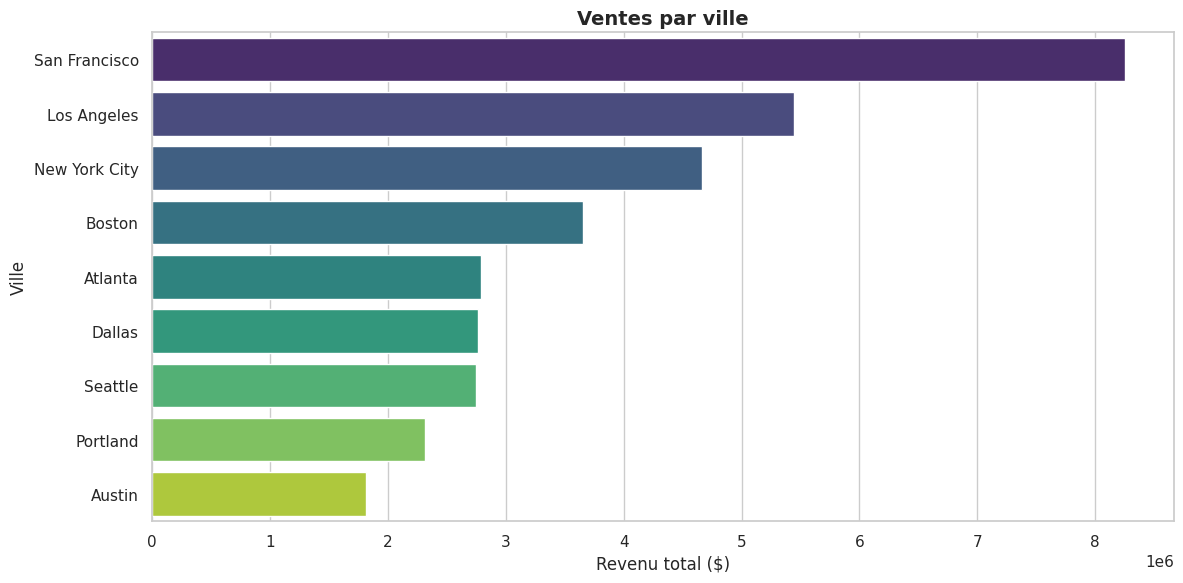

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ---------------------------
# 1. Extraire la ville depuis Purchase Address
# ---------------------------
# Exemple d'adresse : "123 Main St, Boston, MA 02215"
def extract_city(address):
    try:
        return address.split(',')[1].strip()  # La ville est la 2e partie
    except:
        return None

combined_df['City'] = combined_df['Purchase Address'].apply(extract_city)

# Supprimer les lignes avec ville manquante
combined_df = combined_df.dropna(subset=['City'])

# ---------------------------
# 2. Calcul des ventes par ville
# ---------------------------
# S'assurer que 'Revenue' existe
if 'Revenue' not in combined_df.columns:
    combined_df['Revenue'] = combined_df['Quantity Ordered'] * combined_df['Price Each']

city_sales = combined_df.groupby('City')['Revenue'].sum().sort_values(ascending=False)

# ---------------------------
# 3. Visualisation
# ---------------------------
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=city_sales.values, y=city_sales.index, palette="viridis")
plt.title("Ventes par ville", fontsize=14, weight="bold")
plt.xlabel("Revenu total ($)")
plt.ylabel("Ville")
plt.tight_layout()
plt.show()


# 📍 Insight : Ventes par ville

## 1. Classement des performances
| Ville            | Revenus (M$) | Position |
|-----------------|--------------|---------|
| San Francisco   | 8,0+         | 1er     |
| Los Angeles     | 5,4          | 2ème    |
| New York City   | 4,6          | 3ème    |
| Boston          | 3,6          | 4ème    |
| Austin          | 1,8          | 5ème    |

- **San Francisco** : Leader incontesté avec près du double des revenus d’Austin.  
- **Los Angeles** : Deuxième marché clé.  
- **New York City** : Solide troisième place.  
- **Boston** : Quatrième position significative.  
- **Austin** : Ville la moins performante.

---

## 2. Enseignements stratégiques
- **Concentration des ventes** : Les trois premières villes génèrent la **majorité des revenus**.  
- **Opportunité d’expansion** : Les villes comme **Portland, Austin ou Seattle** ont un **potentiel de croissance**, nécessitant une stratégie ciblée.  
- **Diversification nécessaire** : Dépendre trop de San Francisco peut être **risqué en cas de ralentissement économique local**.

---

## 3. Recommandations
- **Renforcer les investissements marketing** dans les villes à forte performance pour consolider le leadership.  
- **Lancer des campagnes promotionnelles** dans les villes moins performantes pour stimuler la demande.  
- **Analyser les préférences locales** pour mieux adapter l’offre et développer des partenariats régionaux.

---

## 4. Conclusion
Les ventes sont fortement **concentrées géographiquement**, offrant à la fois des **forces** et des **opportunités d’optimisation**.  
Une stratégie équilibrée entre **consolidation des marchés principaux** et **développement des marchés secondaires** permettrait d’augmenter le **chiffre d’affaires global**.



In [71]:
import pandas as pd

# Vérifier que Order Date est bien en datetime
if not pd.api.types.is_datetime64_any_dtype(combined_df['Order Date']):
    combined_df['Order Date'] = pd.to_datetime(combined_df['Order Date'], errors='coerce')

# Supprimer les lignes avec dates invalides
combined_df = combined_df.dropna(subset=['Order Date'])

# S'assurer que Revenue existe
if 'Revenue' not in combined_df.columns:
    combined_df['Revenue'] = combined_df['Quantity Ordered'] * combined_df['Price Each']

# Grouper par mois
monthly_sales = combined_df.groupby(combined_df['Order Date'].dt.to_period('M'))['Revenue'].sum()
monthly_sales.index = monthly_sales.index.to_timestamp()  # Convertir en timestamp pour statsmodels

# Afficher les 5 premières lignes pour vérifier
monthly_sales.head()


,Revenue
Order Date,
2019-01-01,1812742.87
2019-02-01,2200078.08
2019-03-01,2804973.35
2019-04-01,3389217.98
2019-05-01,3150616.23


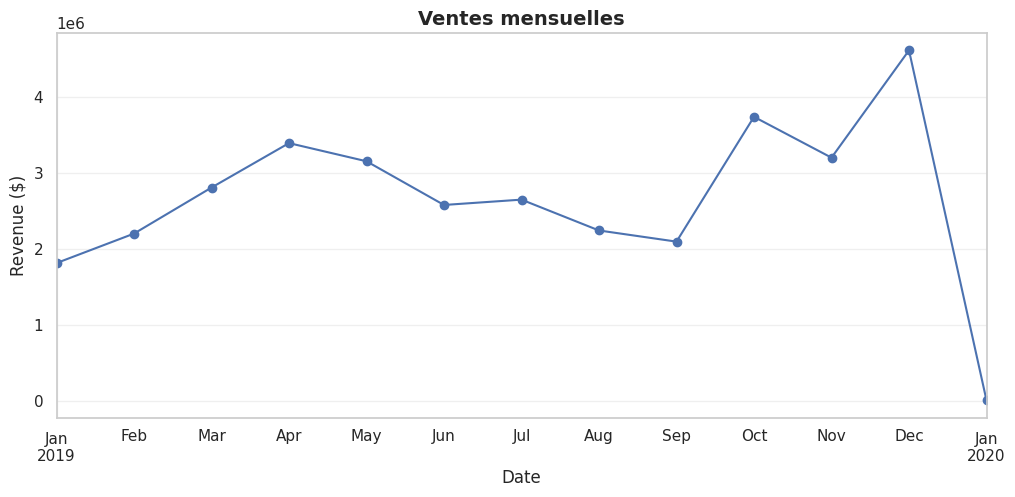

In [72]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
monthly_sales.plot(marker='o')
plt.title("Ventes mensuelles", fontsize=14, weight="bold")
plt.xlabel("Date")
plt.ylabel("Revenue ($)")
plt.grid(True, alpha=0.3)
plt.show()


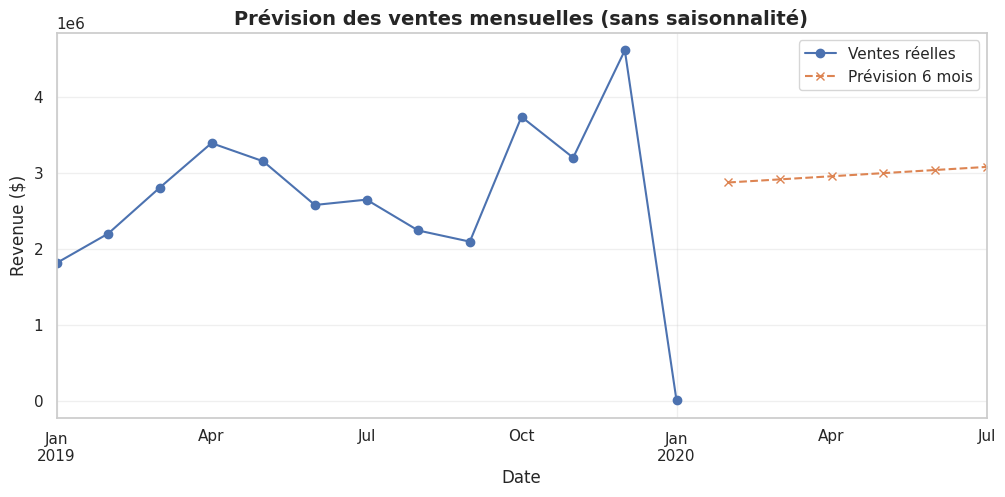

In [74]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Modèle Holt-Winters sans saisonnalité
model = ExponentialSmoothing(
    monthly_sales,
    trend='add',
    seasonal=None
)

fit = model.fit()

# Prévision des 6 prochains mois
forecast = fit.forecast(6)

# Visualisation
plt.figure(figsize=(12,5))
monthly_sales.plot(label='Ventes réelles', marker='o')
forecast.plot(label='Prévision 6 mois', marker='x', linestyle='--')
plt.title("Prévision des ventes mensuelles (sans saisonnalité)", fontsize=14, weight="bold")
plt.xlabel("Date")
plt.ylabel("Revenue ($)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


/tmp/ipython-input-2035407159.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  forecast_seasonal[i] *= seasonal_factors[month]
/tmp/ipython-input-2035407159.py:13: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  forecast_seasonal[i] *= seasonal_factors[month]


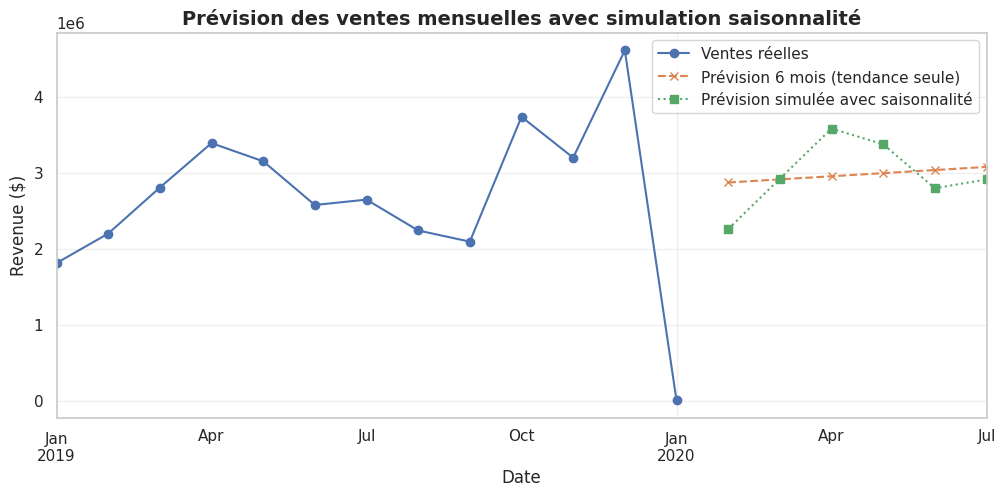

In [77]:
import numpy as np

# Calcul du facteur saisonnier pour chaque mois
monthly_avg = monthly_sales.groupby(monthly_sales.index.month).mean()
seasonal_factors = monthly_avg / monthly_avg.mean()  # multiplicateur relatif

# Prévoir 6 mois à venir
forecast_index = pd.date_range(start=monthly_sales.index[-1] + pd.offsets.MonthBegin(1), periods=6, freq='MS')
forecast_seasonal = forecast.copy()

for i, date in enumerate(forecast_index):
    month = date.month
    forecast_seasonal[i] *= seasonal_factors[month]

# ---------------------------
# Visualisation finale
# ---------------------------
plt.figure(figsize=(12,5))
monthly_sales.plot(label='Ventes réelles', marker='o')
forecast.plot(label='Prévision 6 mois (tendance seule)', marker='x', linestyle='--')
forecast_seasonal.plot(label='Prévision simulée avec saisonnalité', marker='s', linestyle=':')
plt.title("Prévision des ventes mensuelles avec simulation saisonnalité", fontsize=14, weight="bold")
plt.xlabel("Date")
plt.ylabel("Revenue ($)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
